In [1]:
import gymnasium as gym
import environment
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [3]:
env = gym.make('AirfoilEnv-v0', n_params=10, max_steps=5, scale_actions = 0.4, airfoil_seed = [0.1*np.ones(10), -0.1*np.ones(10), 0.0], render_mode = "human")
model = PPO.load("models/Good/14042024_DeltaReward/14042024_DeltaReward", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, env=env, n_eval_episodes=10)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

Step: 0, Action: [[ 1.          1.          1.          1.          1.          0.22711621
   0.6554025   1.          1.          1.         -1.         -1.
  -0.787095    0.53404653 -0.34015542 -1.         -1.         -1.
  -0.55520016 -1.          0.13020225]], Reward: [24.470192], Done: [False], Info: [{'step': 1, 'efficiency': 24.470192757771805, 'cl': 0.39450984295779823, 'TimeLimit.truncated': False}]


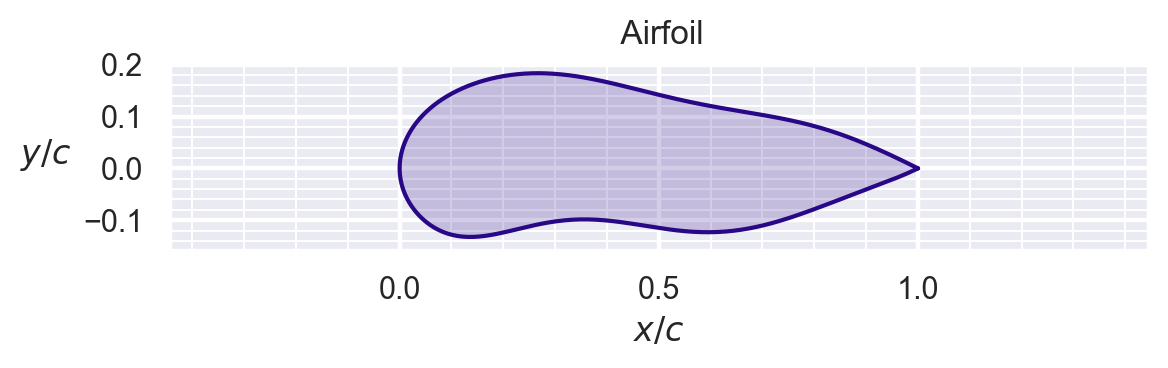

Step: 1, Action: [[ 1.          0.30176693  0.7101543  -0.8987365   0.850332    0.24017026
  -0.67608553  1.          0.27838174  0.5261036  -1.         -1.
   0.36860707  1.         -1.         -1.         -1.          0.30973443
  -0.47361177 -1.         -0.3972877 ]], Reward: [12.57981], Done: [False], Info: [{'step': 2, 'efficiency': 12.579810083515602, 'cl': 0.9600934543961932, 'TimeLimit.truncated': False}]


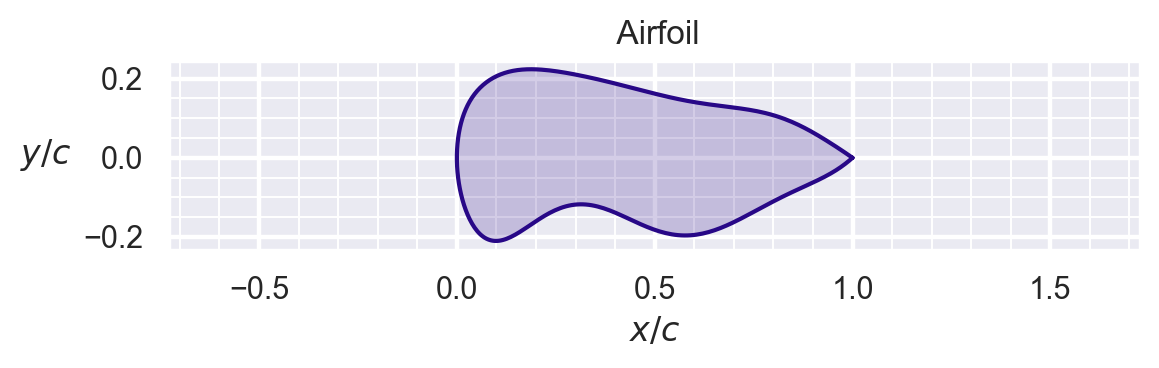

Step: 2, Action: [[-0.47300297 -0.47745478  0.1103517  -1.          0.08638695  0.17711565
  -1.          1.          0.5502143   1.         -1.         -1.
   0.68028086  0.4470446  -0.18443349 -0.83412904 -1.          1.
  -1.         -0.61734027 -0.84832376]], Reward: [10.967673], Done: [False], Info: [{'step': 3, 'efficiency': 10.967673003624908, 'cl': 1.0948564154220641, 'TimeLimit.truncated': False}]


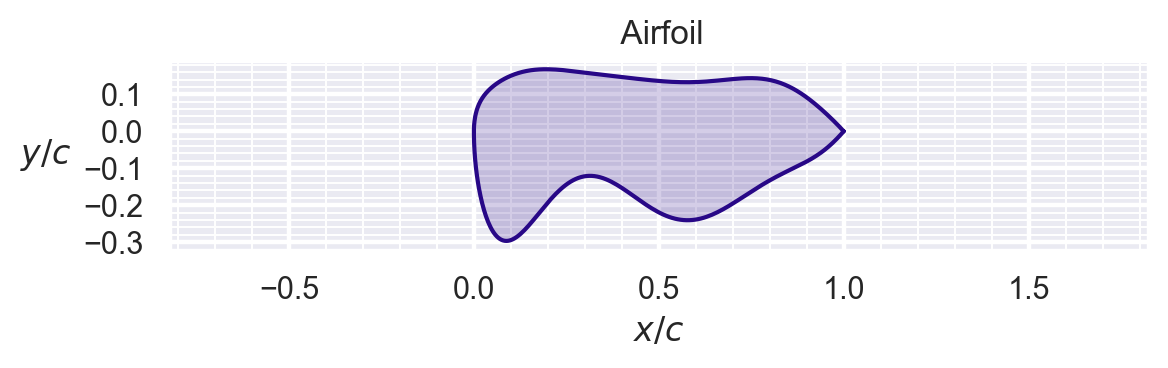

Step: 3, Action: [[ 6.5836027e-02  4.3556094e-05 -1.4133215e-02 -4.4726273e-01
  -6.7129159e-01  8.3385915e-01 -1.0000000e+00  1.0000000e+00
   2.4107707e-01  1.0000000e+00 -1.0000000e+00 -4.0796474e-02
   3.6235386e-01  4.6076223e-02  6.2027258e-01  2.1682689e-01
  -1.0000000e+00  1.0000000e+00 -1.0000000e+00 -2.8518724e-01
   3.0858603e-01]], Reward: [10.52996], Done: [False], Info: [{'step': 4, 'efficiency': 10.52995936754273, 'cl': 1.0744561397919692, 'TimeLimit.truncated': False}]


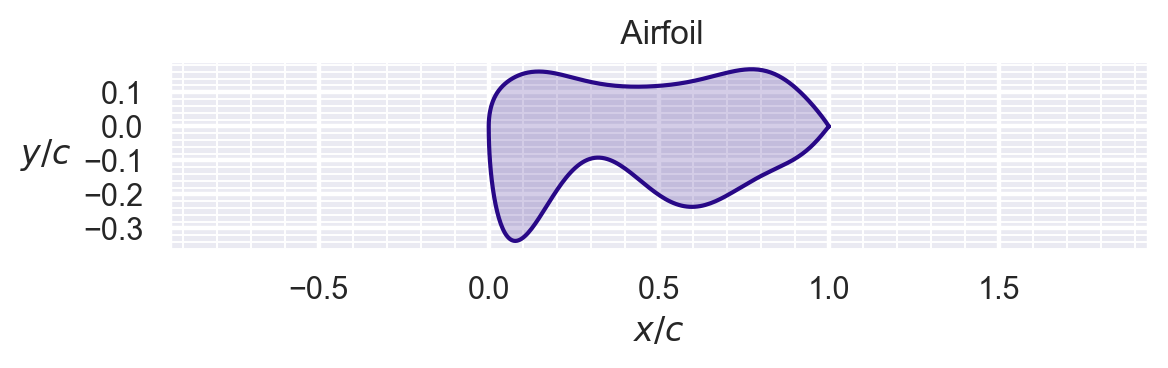

Step: 4, Action: [[-0.3219183  -0.13723214  0.16011141  0.7697766  -1.          1.
  -1.          0.5462419  -0.20583397  1.         -1.          0.11593939
   0.4286783  -0.2657263   0.395251    1.         -1.          1.
  -1.          0.13356318  0.35723585]], Reward: [10.411332], Done: [ True], Info: [{'step': 5, 'efficiency': 10.411332278638582, 'cl': 1.068416594559464, 'episode': {'r': 68.958967, 'l': 5, 't': 5.859393}, 'TimeLimit.truncated': False, 'terminal_observation': array([ 0.6083659 ,  0.37484944,  0.8865937 , -0.13048905,  0.20617095,
        1.0913045 , -1.1082733 ,  1.9184967 ,  0.8455357 ,  1.9104415 ,
       -2.1000001 , -1.2699429 ,  0.32113004,  0.60457647, -0.30362615,
       -0.7469209 , -2.1000001 ,  0.8238938 , -1.7115248 , -1.2075858 ,
       -0.17983493], dtype=float32)}]


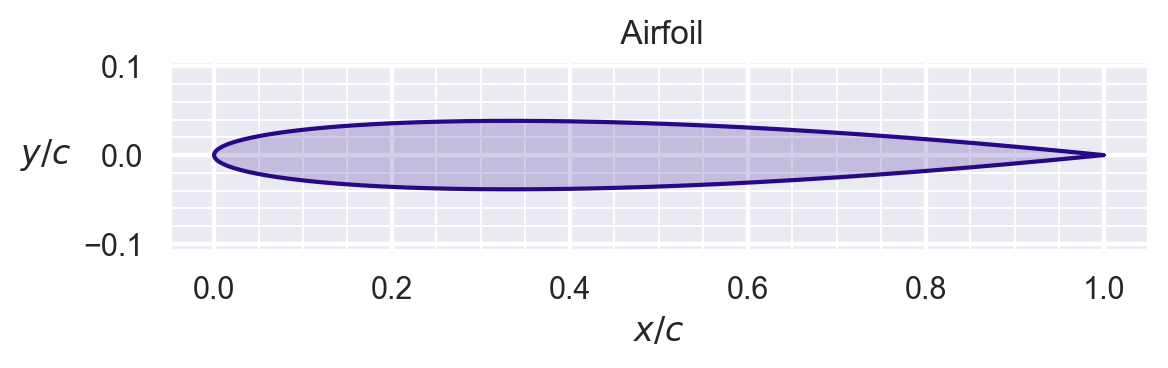

In [4]:
# Enjoy trained agent
vec_env = model.get_env()
obs = vec_env.reset()
for i in range(5):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    print(f"Step: {i}, Action: {action}, Reward: {rewards}, Done: {dones}, Info: {info}")
    vec_env.render()